# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset: Titanic - Machine Learning from Disaster

Sumber: Kaggle (https://www.kaggle.com/c/titanic)

Deskripsi:
Dataset ini berisi informasi tentang penumpang kapal Titanic yang tenggelam pada tahun 1912.
Tujuan: Memprediksi apakah seorang penumpang selamat (Survived = 1) atau tidak (Survived = 0)

Fitur-fitur:
- PassengerId: ID unik penumpang
- Survived: Status kelangsungan hidup (0 = Tidak selamat, 1 = Selamat) [TARGET]
- Pclass: Kelas tiket (1 = Kelas 1, 2 = Kelas 2, 3 = Kelas 3)
- Name: Nama penumpang
- Sex: Jenis kelamin
- Age: Usia dalam tahun
- SibSp: Jumlah saudara kandung/pasangan di kapal
- Parch: Jumlah orang tua/anak di kapal
- Ticket: Nomor tiket
- Fare: Harga tiket
- Cabin: Nomor kabin
- Embarked: Pelabuhan keberangkatan (C = Cherbourg, Q = Queenstown, S = Southampton)

Total Data: 418 baris (test set)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Load dataset
df = pd.read_csv('titanic_raw.csv')

print("="*60)
print("DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

# Display first few rows
print("\n" + "="*60)
print("FIRST 5 ROWS OF DATASET")
print("="*60)
print(df.head())

# Display basic info
print("\n" + "="*60)
print("DATASET INFORMATION")
print("="*60)
print(df.info())

# Display statistical summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print(df.describe())

DATASET LOADED SUCCESSFULLY

Dataset Shape: (418, 12)
Total Rows: 418
Total Columns: 12

FIRST 5 ROWS OF DATASET
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


EXPLORATORY DATA ANALYSIS

📊 Missing Values Analysis:
------------------------------------------------------------
       Missing Count  Percentage
Cabin            327   78.229665
Age               86   20.574163
Fare               1    0.239234


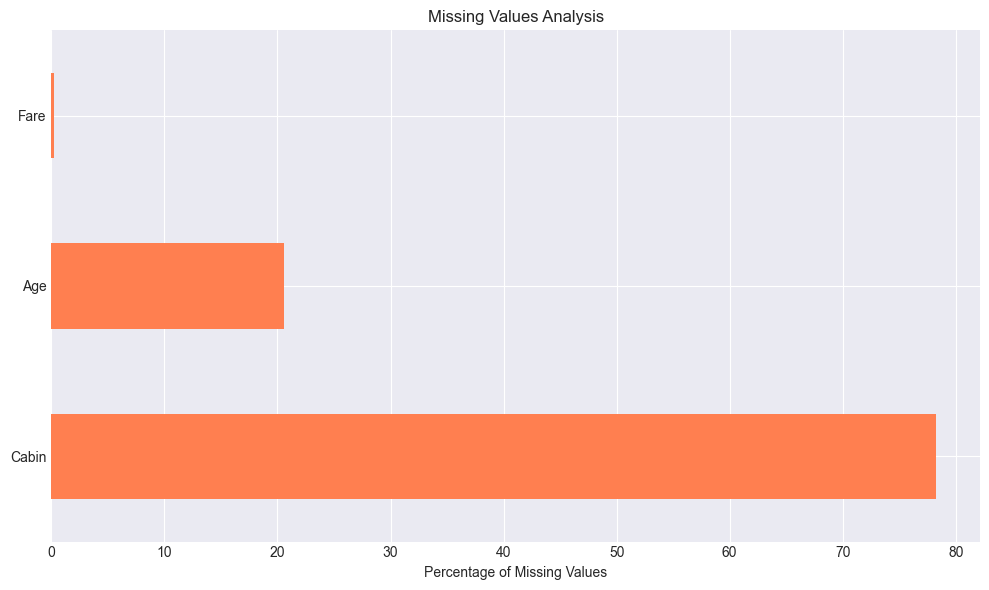


📊 Target Variable Distribution (Survived):
------------------------------------------------------------
Survived
0    266
1    152
Name: count, dtype: int64

Percentage:
Survived
0    63.636364
1    36.363636
Name: proportion, dtype: float64


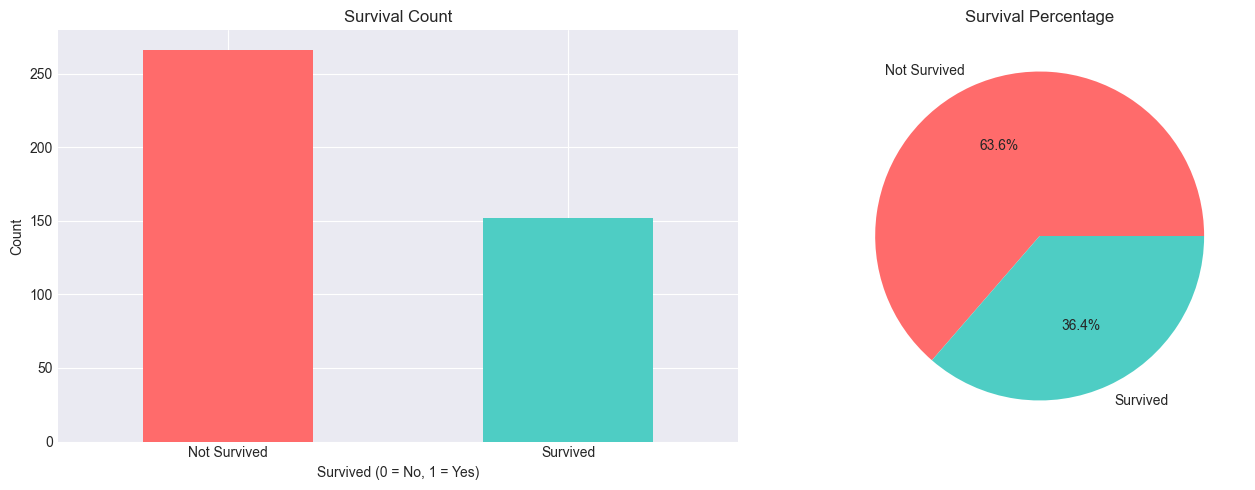


📊 Numerical Features Analysis:
------------------------------------------------------------
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


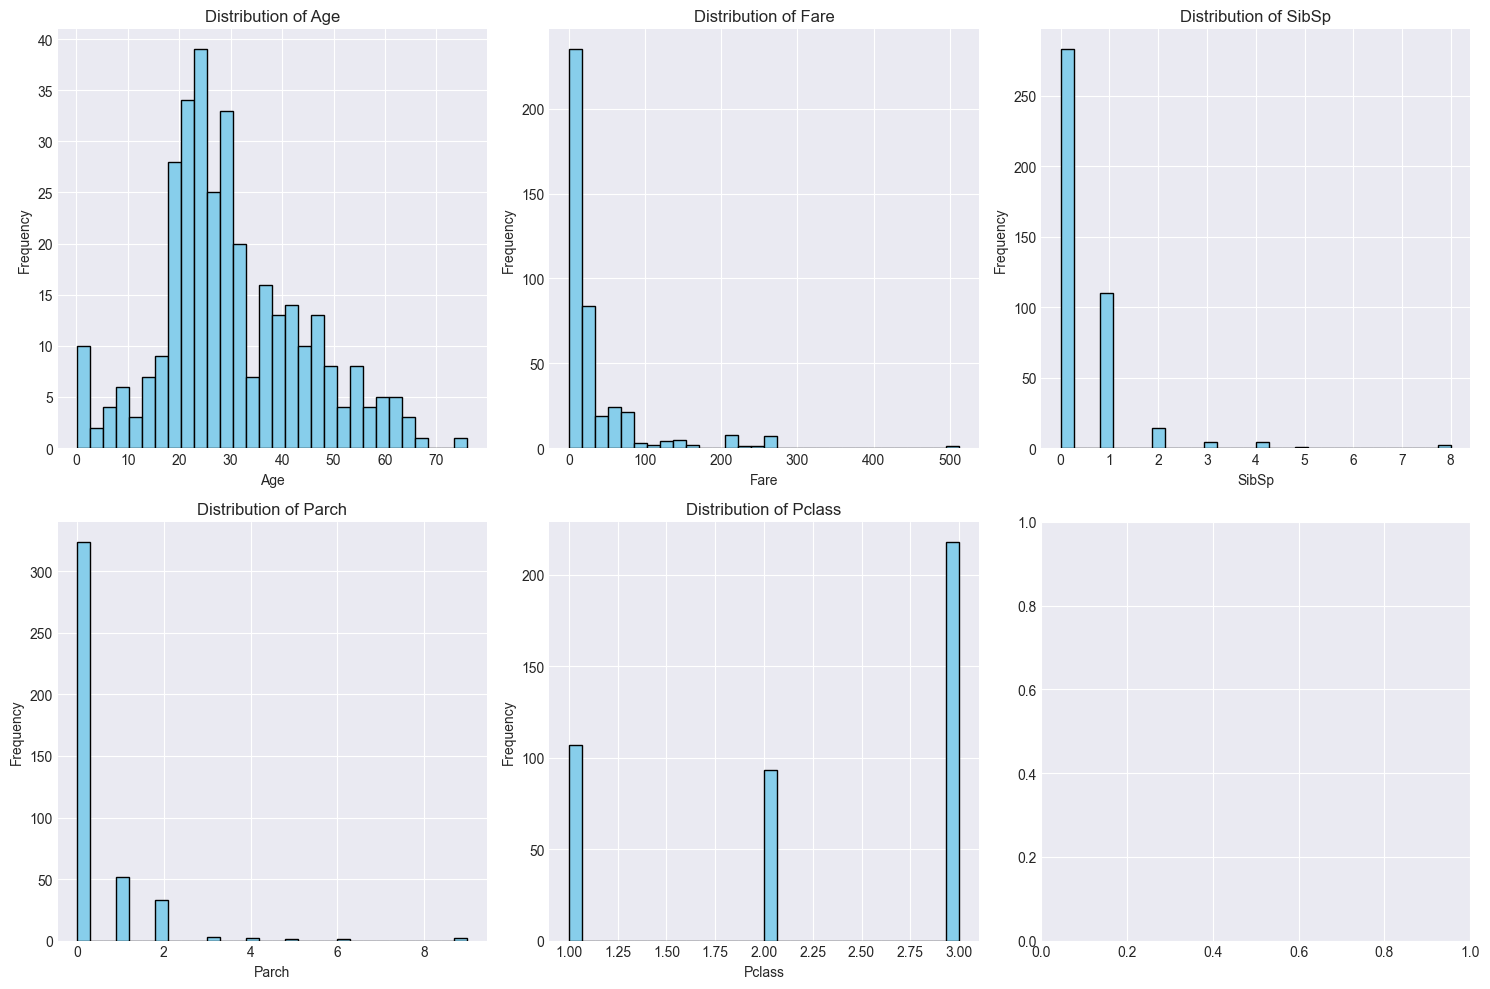


📊 Categorical Features Analysis:
------------------------------------------------------------

Sex Distribution:
Sex
male      266
female    152
Name: count, dtype: int64

Pclass Distribution:
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Embarked Distribution:
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


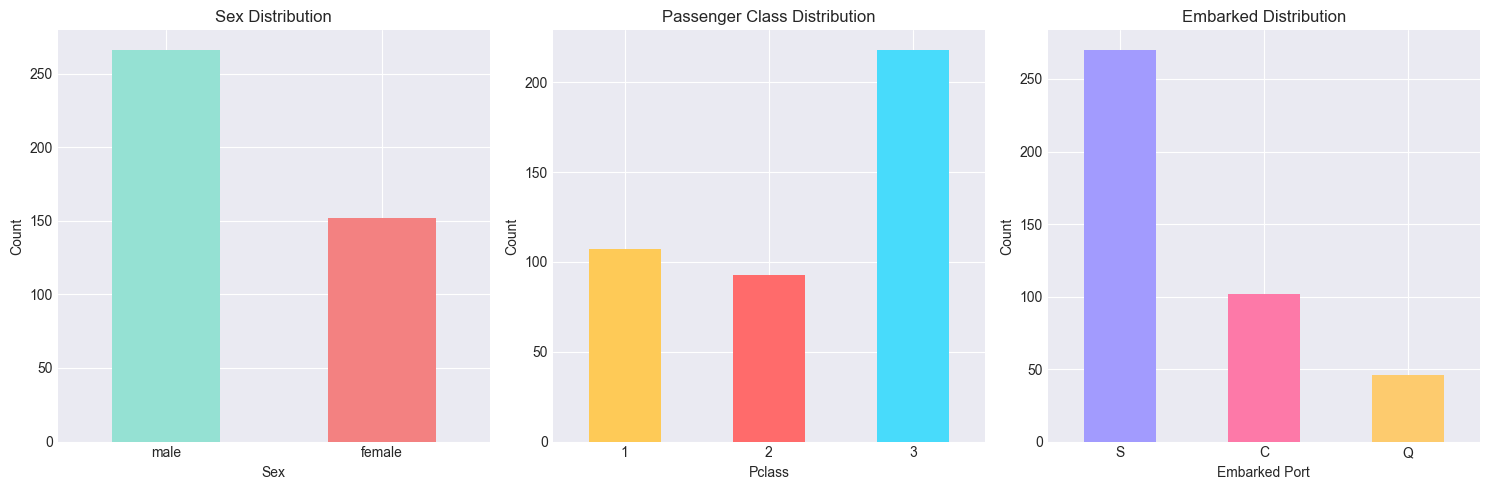


📊 Correlation Analysis:
------------------------------------------------------------

Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.108615 -0.000013  0.099943  0.159120  0.191514
Pclass   -0.108615  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age      -0.000013 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp     0.099943  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch     0.159120  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare      0.191514 -0.577147  0.337932  0.171539  0.230046  1.000000


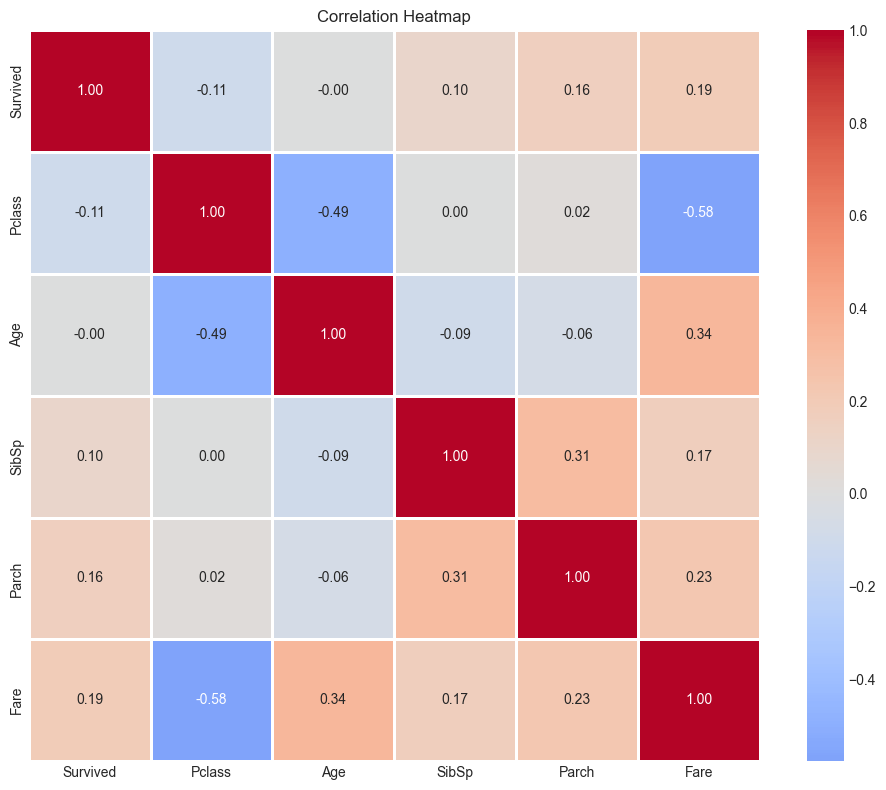


📊 Survival Analysis by Features:
------------------------------------------------------------

Survival Rate by Sex:
Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


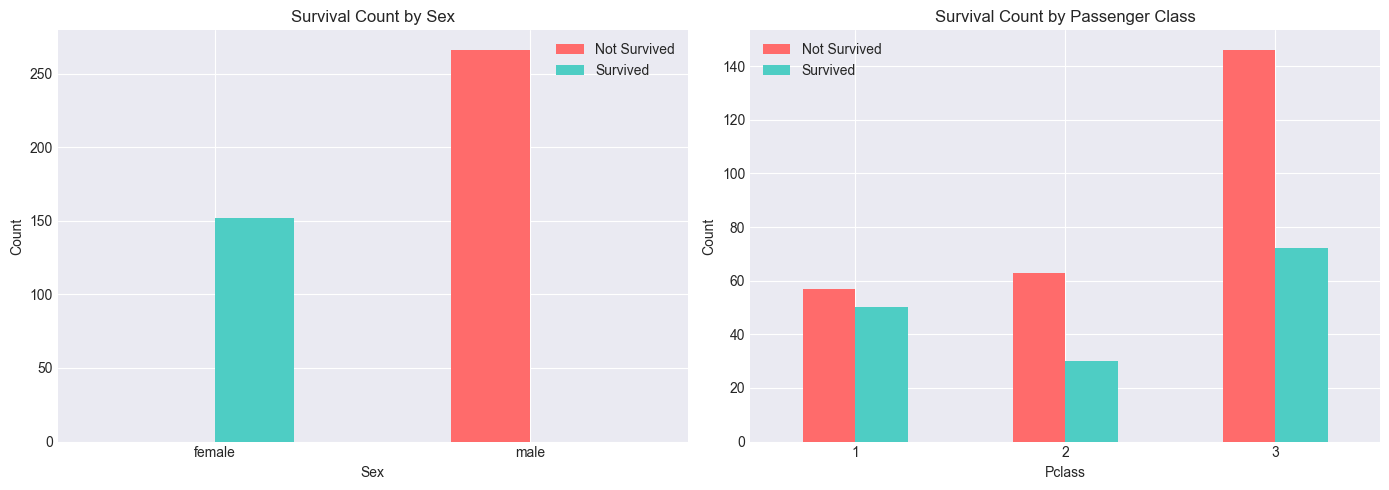

In [5]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# 4.1 Missing Values Analysis
print("\n📊 Missing Values Analysis:")
print("-"*60)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_df['Percentage'].plot(kind='barh', color='coral')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values Analysis')
plt.tight_layout()
plt.show()

# 4.2 Target Variable Distribution
print("\n📊 Target Variable Distribution (Survived):")
print("-"*60)
print(df['Survived'].value_counts())
print("\nPercentage:")
print(df['Survived'].value_counts(normalize=True) * 100)

# Visualize survival distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Survival Count')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Survived', 'Survived'], rotation=0)

# Pie chart
df['Survived'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    colors=['#FF6B6B', '#4ECDC4'], labels=['Not Survived', 'Survived'])
axes[1].set_title('Survival Percentage')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# 4.3 Numerical Features Analysis
print("\n📊 Numerical Features Analysis:")
print("-"*60)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Distribution of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 4.4 Categorical Features Analysis
print("\n📊 Categorical Features Analysis:")
print("-"*60)

# Sex distribution
print("\nSex Distribution:")
print(df['Sex'].value_counts())

# Pclass distribution
print("\nPclass Distribution:")
print(df['Pclass'].value_counts())

# Embarked distribution
print("\nEmbarked Distribution:")
print(df['Embarked'].value_counts())

# Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sex
df['Sex'].value_counts().plot(kind='bar', ax=axes[0], color=['#95E1D3', '#F38181'])
axes[0].set_title('Sex Distribution')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Pclass
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['#FECA57', '#FF6B6B', '#48DBFB'])
axes[1].set_title('Passenger Class Distribution')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Embarked
df['Embarked'].value_counts().plot(kind='bar', ax=axes[2], color=['#A29BFE', '#FD79A8', '#FDCB6E'])
axes[2].set_title('Embarked Distribution')
axes[2].set_xlabel('Embarked Port')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 4.5 Correlation Analysis
print("\n📊 Correlation Analysis:")
print("-"*60)

# Select numerical columns for correlation
numerical_data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
correlation_matrix = numerical_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 4.6 Survival Analysis by Features
print("\n📊 Survival Analysis by Features:")
print("-"*60)

# Survival by Sex
print("\nSurvival Rate by Sex:")
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)

# Survival by Pclass
print("\nSurvival Rate by Pclass:")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_pclass)

# Visualize survival by features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survival by Sex
sex_survival = df.groupby(['Sex', 'Survived']).size().unstack()
sex_survival.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Survival Count by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].legend(['Not Survived', 'Survived'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Survival by Pclass
pclass_survival = df.groupby(['Pclass', 'Survived']).size().unstack()
pclass_survival.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Survival Count by Passenger Class')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')
axes[1].legend(['Not Survived', 'Survived'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Create a copy for preprocessing
df_processed = df.copy()

# 5.1 Handle Missing Values
print("\n🔧 Step 1: Handling Missing Values")
print("-"*60)

# Fill Age with median
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
print("✓ Age: Filled with median value")

# Fill Fare with median
df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)
print("✓ Fare: Filled with median value")

# Fill Embarked with mode
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
print("✓ Embarked: Filled with mode value")

# Drop Cabin (too many missing values)
df_processed.drop('Cabin', axis=1, inplace=True)
print("✓ Cabin: Dropped (too many missing values)")

print("\nMissing values after handling:")
print(df_processed.isnull().sum())

# 5.2 Feature Engineering
print("\n🔧 Step 2: Feature Engineering")
print("-"*60)

# Create FamilySize feature
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
print("✓ Created FamilySize feature (SibSp + Parch + 1)")

# Create IsAlone feature
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
print("✓ Created IsAlone feature")

# Create Age groups
df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                   bins=[0, 12, 18, 35, 60, 100],
                                   labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])
print("✓ Created AgeGroup feature")

# Create Fare bins
df_processed['FareBin'] = pd.qcut(df_processed['Fare'], q=4,
                                   labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
print("✓ Created FareBin feature")

# 5.3 Drop Unnecessary Columns
print("\n🔧 Step 3: Dropping Unnecessary Columns")
print("-"*60)

columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df_processed.drop(columns_to_drop, axis=1, inplace=True)
print(f"✓ Dropped columns: {columns_to_drop}")

# 5.4 Encode Categorical Variables
print("\n🔧 Step 4: Encoding Categorical Variables")
print("-"*60)

# Label Encoding for binary/ordinal features
le = LabelEncoder()

# Encode Sex
df_processed['Sex'] = le.fit_transform(df_processed['Sex'])
print("✓ Sex encoded (male=1, female=0)")

# Encode Embarked
df_processed['Embarked'] = le.fit_transform(df_processed['Embarked'])
print("✓ Embarked encoded")

# Encode AgeGroup
df_processed['AgeGroup'] = le.fit_transform(df_processed['AgeGroup'])
print("✓ AgeGroup encoded")

# Encode FareBin
df_processed['FareBin'] = le.fit_transform(df_processed['FareBin'])
print("✓ FareBin encoded")

# 5.5 Feature Scaling
print("\n🔧 Step 5: Feature Scaling")
print("-"*60)

# Separate features and target
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

print(f"✓ Scaled features: {numerical_features}")

# 5.6 Train-Test Split
print("\n🔧 Step 6: Train-Test Split")
print("-"*60)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

print(f"✓ Training set size: {X_train.shape[0]} samples")
print(f"✓ Testing set size: {X_test.shape[0]} samples")
print(f"✓ Number of features: {X_train.shape[1]}")

# Display final preprocessed data
print("\n" + "="*60)
print("PREPROCESSED DATA SUMMARY")
print("="*60)
print("\nFeatures shape:", X_scaled.shape)
print("Target shape:", y.shape)
print("\nFirst 5 rows of preprocessed data:")
print(X_scaled.head())

print("\n✅ DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*60)

# Save preprocessed data
X_scaled.to_csv('titanic_preprocessing.csv', index=False)
y.to_csv('titanic_target.csv', index=False)
print("\n✅ Preprocessed data saved:")
print("   - titanic_preprocessing.csv (features)")
print("   - titanic_target.csv (target)")

print("\n" + "="*60)
print("EKSPERIMEN SELESAI!")
print("="*60)
print("\n📝 Next Steps:")
print("1. Gunakan data preprocessing untuk melatih model")
print("2. Buat file automate_Mohammad-Fajar-Mashum.py (untuk Skilled)")
print("3. Setup GitHub Actions workflow (untuk Advanced)")


DATA PREPROCESSING

🔧 Step 1: Handling Missing Values
------------------------------------------------------------
✓ Age: Filled with median value
✓ Fare: Filled with median value
✓ Embarked: Filled with mode value
✓ Cabin: Dropped (too many missing values)

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

🔧 Step 2: Feature Engineering
------------------------------------------------------------
✓ Created FamilySize feature (SibSp + Parch + 1)
✓ Created IsAlone feature
✓ Created AgeGroup feature
✓ Created FareBin feature

🔧 Step 3: Dropping Unnecessary Columns
------------------------------------------------------------
✓ Dropped columns: ['PassengerId', 'Name', 'Ticket']

🔧 Step 4: Encoding Categorical Variables
------------------------------------------------------------
✓ Sex encoded (male=1, female=0)